In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.linear_model import Perceptron
import pandas as pd

In [9]:
#updated path of data:
#importing the zipfile module
from zipfile import ZipFile
with ZipFile("/content/drive/MyDrive/archive (1).zip", 'r') as zObject:

    zObject.extractall(
        path="/content/drive/MyDrive")


df = pd.read_csv('/content/drive/MyDrive/hrv_dataset/hrv_dataset/data/final/train.csv')

In [10]:
#mounting the google drive:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
#df = pd.read_csv("hrv dataset/hrv dataset/data/final/train.csv")


FileNotFoundError: [Errno 2] No such file or directory: 'hrv dataset/hrv dataset/data/final/train.csv'

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369289 entries, 0 to 369288
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   MEAN_RR            369289 non-null  float64
 1   MEDIAN_RR          369289 non-null  float64
 2   SDRR               369289 non-null  float64
 3   RMSSD              369289 non-null  float64
 4   SDSD               369289 non-null  float64
 5   SDRR_RMSSD         369289 non-null  float64
 6   HR                 369289 non-null  float64
 7   pNN25              369289 non-null  float64
 8   pNN50              369289 non-null  float64
 9   SD1                369289 non-null  float64
 10  SD2                369289 non-null  float64
 11  KURT               369289 non-null  float64
 12  SKEW               369289 non-null  float64
 13  MEAN_REL_RR        369289 non-null  float64
 14  MEDIAN_REL_RR      369289 non-null  float64
 15  SDRR_REL_RR        369289 non-null  float64
 16  RM

In [13]:
print(df.describe())

             MEAN_RR      MEDIAN_RR           SDRR          RMSSD  \
count  369289.000000  369289.000000  369289.000000  369289.000000   
mean      846.650104     841.965890     109.352531      14.977498   
std       124.603984     132.321005      77.117025       4.120766   
min       547.492221     517.293295      27.233947       5.529742   
25%       760.228533     755.750735      64.205641      11.830959   
50%       822.951438     819.689595      82.608243      14.415918   
75%       924.117422     916.821570     118.237002      17.927144   
max      1322.016957    1653.122250     563.486949      26.629477   

                SDSD     SDRR_RMSSD             HR          pNN25  \
count  369289.000000  369289.000000  369289.000000  369289.000000   
mean       14.976767       7.396597      73.941824       9.841143   
std         4.120768       5.143834      10.337453       8.195574   
min         5.529630       2.660381      48.737243       0.000000   
25%        11.830671       4.5418

In [14]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [15]:
def pie_chart_condition(df):
    column_name = 'condition'

    # Count the occurrences of each category
    data = df[column_name].value_counts()

    # Create a pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Pie Chart of {column_name}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

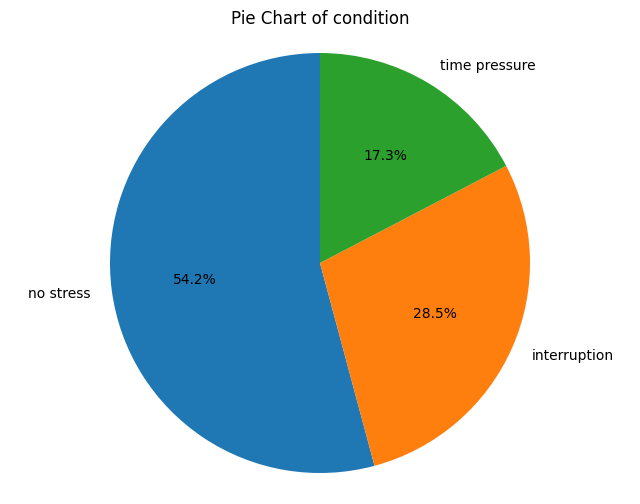

In [16]:
pie_chart_condition(df)

In [17]:
def replace_stress_factors(df):
    df['condition'] = df['condition'].replace(
        {'time pressure': 'Stressed', 'interruption': 'Stressed'}
    )

In [18]:
replace_stress_factors(df)

In [19]:
def graph(df):
# Set up the plot
    num_features = df.shape[1]  # Number of features
    fig, axes = plt.subplots(nrows=(num_features + 1) // 2, ncols=2, figsize=(14, 4 * ((num_features + 1) // 2)))
    axes = axes.flatten()  # Flatten the axes array for easy indexing

    # Iterate through each column and plot
    for i, column in enumerate(df.columns):
        if pd.api.types.is_numeric_dtype(df[column]):  # Check if the column is numeric
            axes[i].hist(df[column], bins=20, color='skyblue', edgecolor='black')
            axes[i].set_title(f'Histogram of {column}')
            axes[i].set_xlabel(column)
            axes[i].set_ylabel('Frequency')
            axes[i].grid(axis='y')
        else:
            data = df[column].value_counts()
            axes[i].bar(data.index.astype(str), data.values, color='skyblue')
            axes[i].set_title(f'Bar Graph of {column}')
            axes[i].set_xlabel(column)
            axes[i].set_ylabel('Frequency')
            axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
            axes[i].grid(axis='y')

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

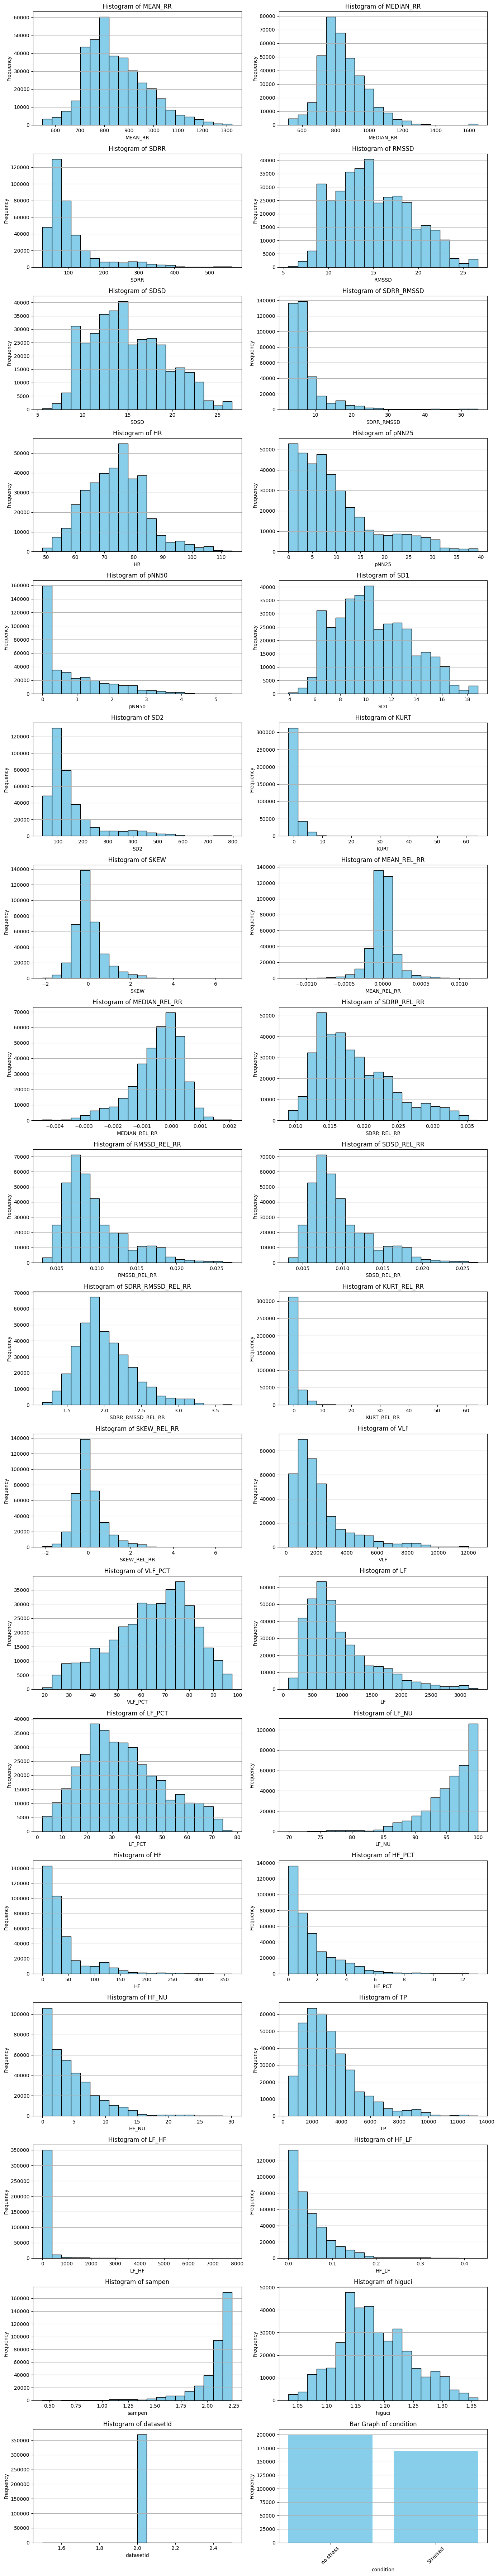

In [20]:
graph(df)

In [21]:
def remove_outliers_iqr(df):
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.20)
        Q3 = df[column].quantile(0.85)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df


In [22]:
cleaned_df = remove_outliers_iqr(df)

In [23]:
cleaned_df.shape

(262529, 36)

In [24]:
cleaned_df.describe()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId
count,262529.000000,262529.000000,262529.000000,262529.000000,262529.000000,262529.000000,262529.000000,262529.000000,262529.000000,262529.000000,...,262529.000000,262529.000000,262529.000000,262529.000000,262529.000000,262529.000000,262529.000000,262529.000000,262529.000000,262529.0
mean,835.667885,837.801577,80.974137,14.347960,14.347696,5.752837,73.469985,8.955911,0.588988,10.148739,...,96.284190,29.919118,1.507661,3.715810,2549.765312,68.134451,0.039694,2.134098,1.189015,2.0
std,91.954545,93.014938,30.533233,3.999873,3.999852,1.759415,8.174249,8.116847,0.794100,2.829266,...,3.074492,27.592587,1.418724,3.074492,1223.187530,82.869742,0.034551,0.071677,0.057966,0.0
min,562.622537,554.940320,27.233947,5.529742,5.529630,2.660381,55.217892,0.000000,0.000000,3.911344,...,85.139373,1.125854,0.038147,0.224151,377.692795,5.729191,0.002247,1.875733,1.057620,2.0
25%,771.626190,773.441115,60.240740,11.356373,11.356088,4.409377,67.446295,3.000000,0.000000,8.032647,...,94.632478,11.399918,0.406526,1.226358,1613.439211,17.630569,0.012416,2.099025,1.147065,2.0
50%,820.551163,826.958170,74.143012,13.689216,13.689131,5.543480,73.787398,6.400000,0.200000,9.682907,...,97.068745,22.921329,1.074651,2.931255,2396.544464,33.115082,0.030198,2.155677,1.179494,2.0
75%,899.719431,902.370180,95.411926,16.944896,16.944476,6.686320,78.409798,11.933333,0.866667,11.985553,...,98.773642,37.578683,2.080445,5.367522,3313.622182,80.542229,0.056720,2.187043,1.225979,2.0
max,1111.686777,1145.789550,237.830744,26.502718,26.502507,14.774340,107.185211,39.400000,4.600000,18.746357,...,99.775849,129.894994,7.169156,14.860627,7456.421182,445.128249,0.174545,2.234841,1.354918,2.0


In [25]:
missing_values = cleaned_df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


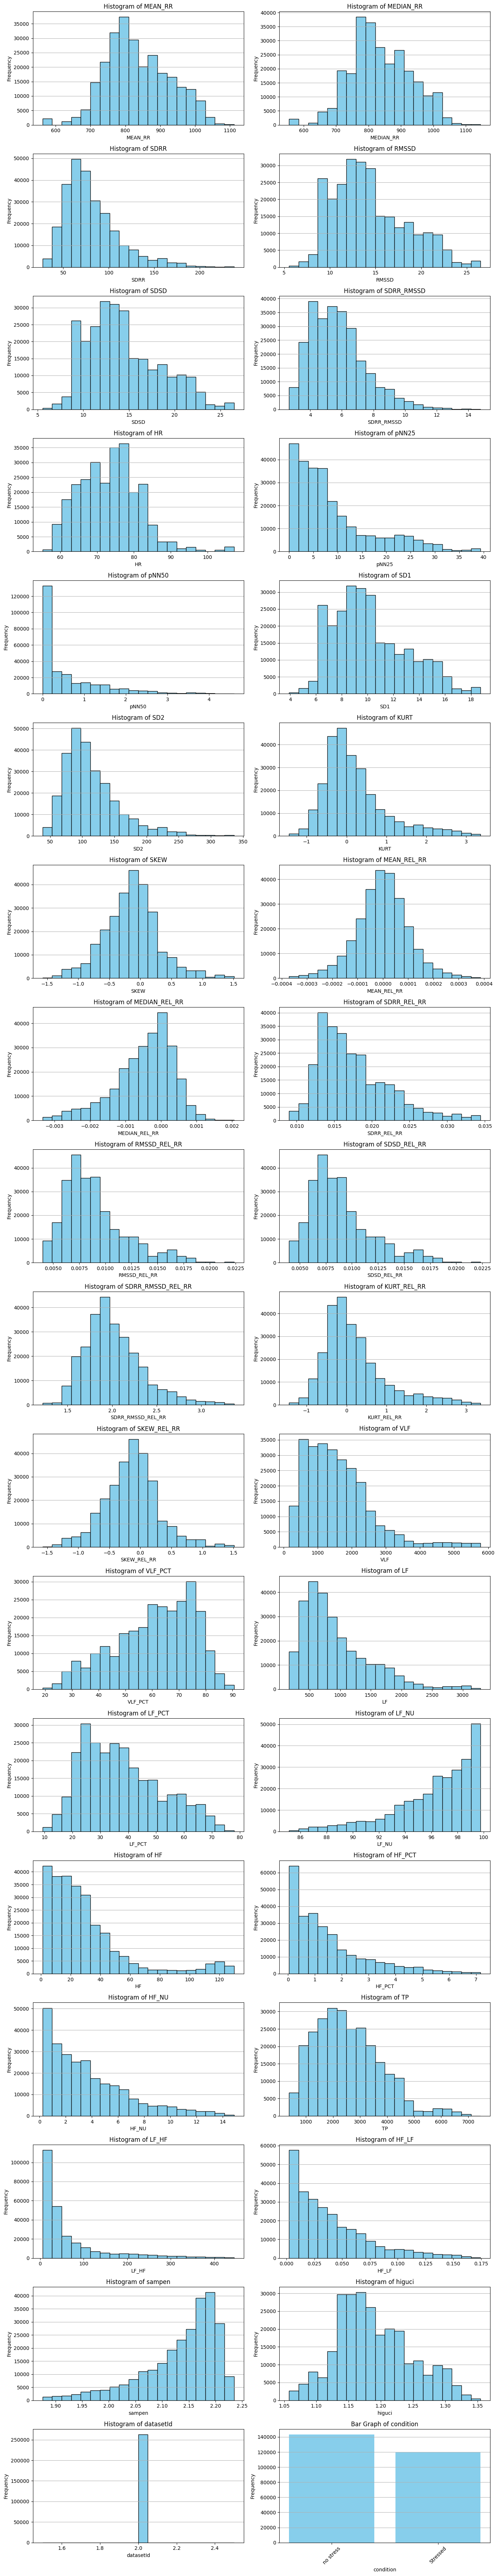

In [26]:
graph(cleaned_df)

In [27]:
def heatmap(df):
    # Select only the numeric columns
    numeric_df = df.select_dtypes(include=['float64', 'int64'])

    # Calculate the correlation matrix
    corr_matrix = numeric_df.corr().round(2)
    plt.figure(figsize=(30, 24))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

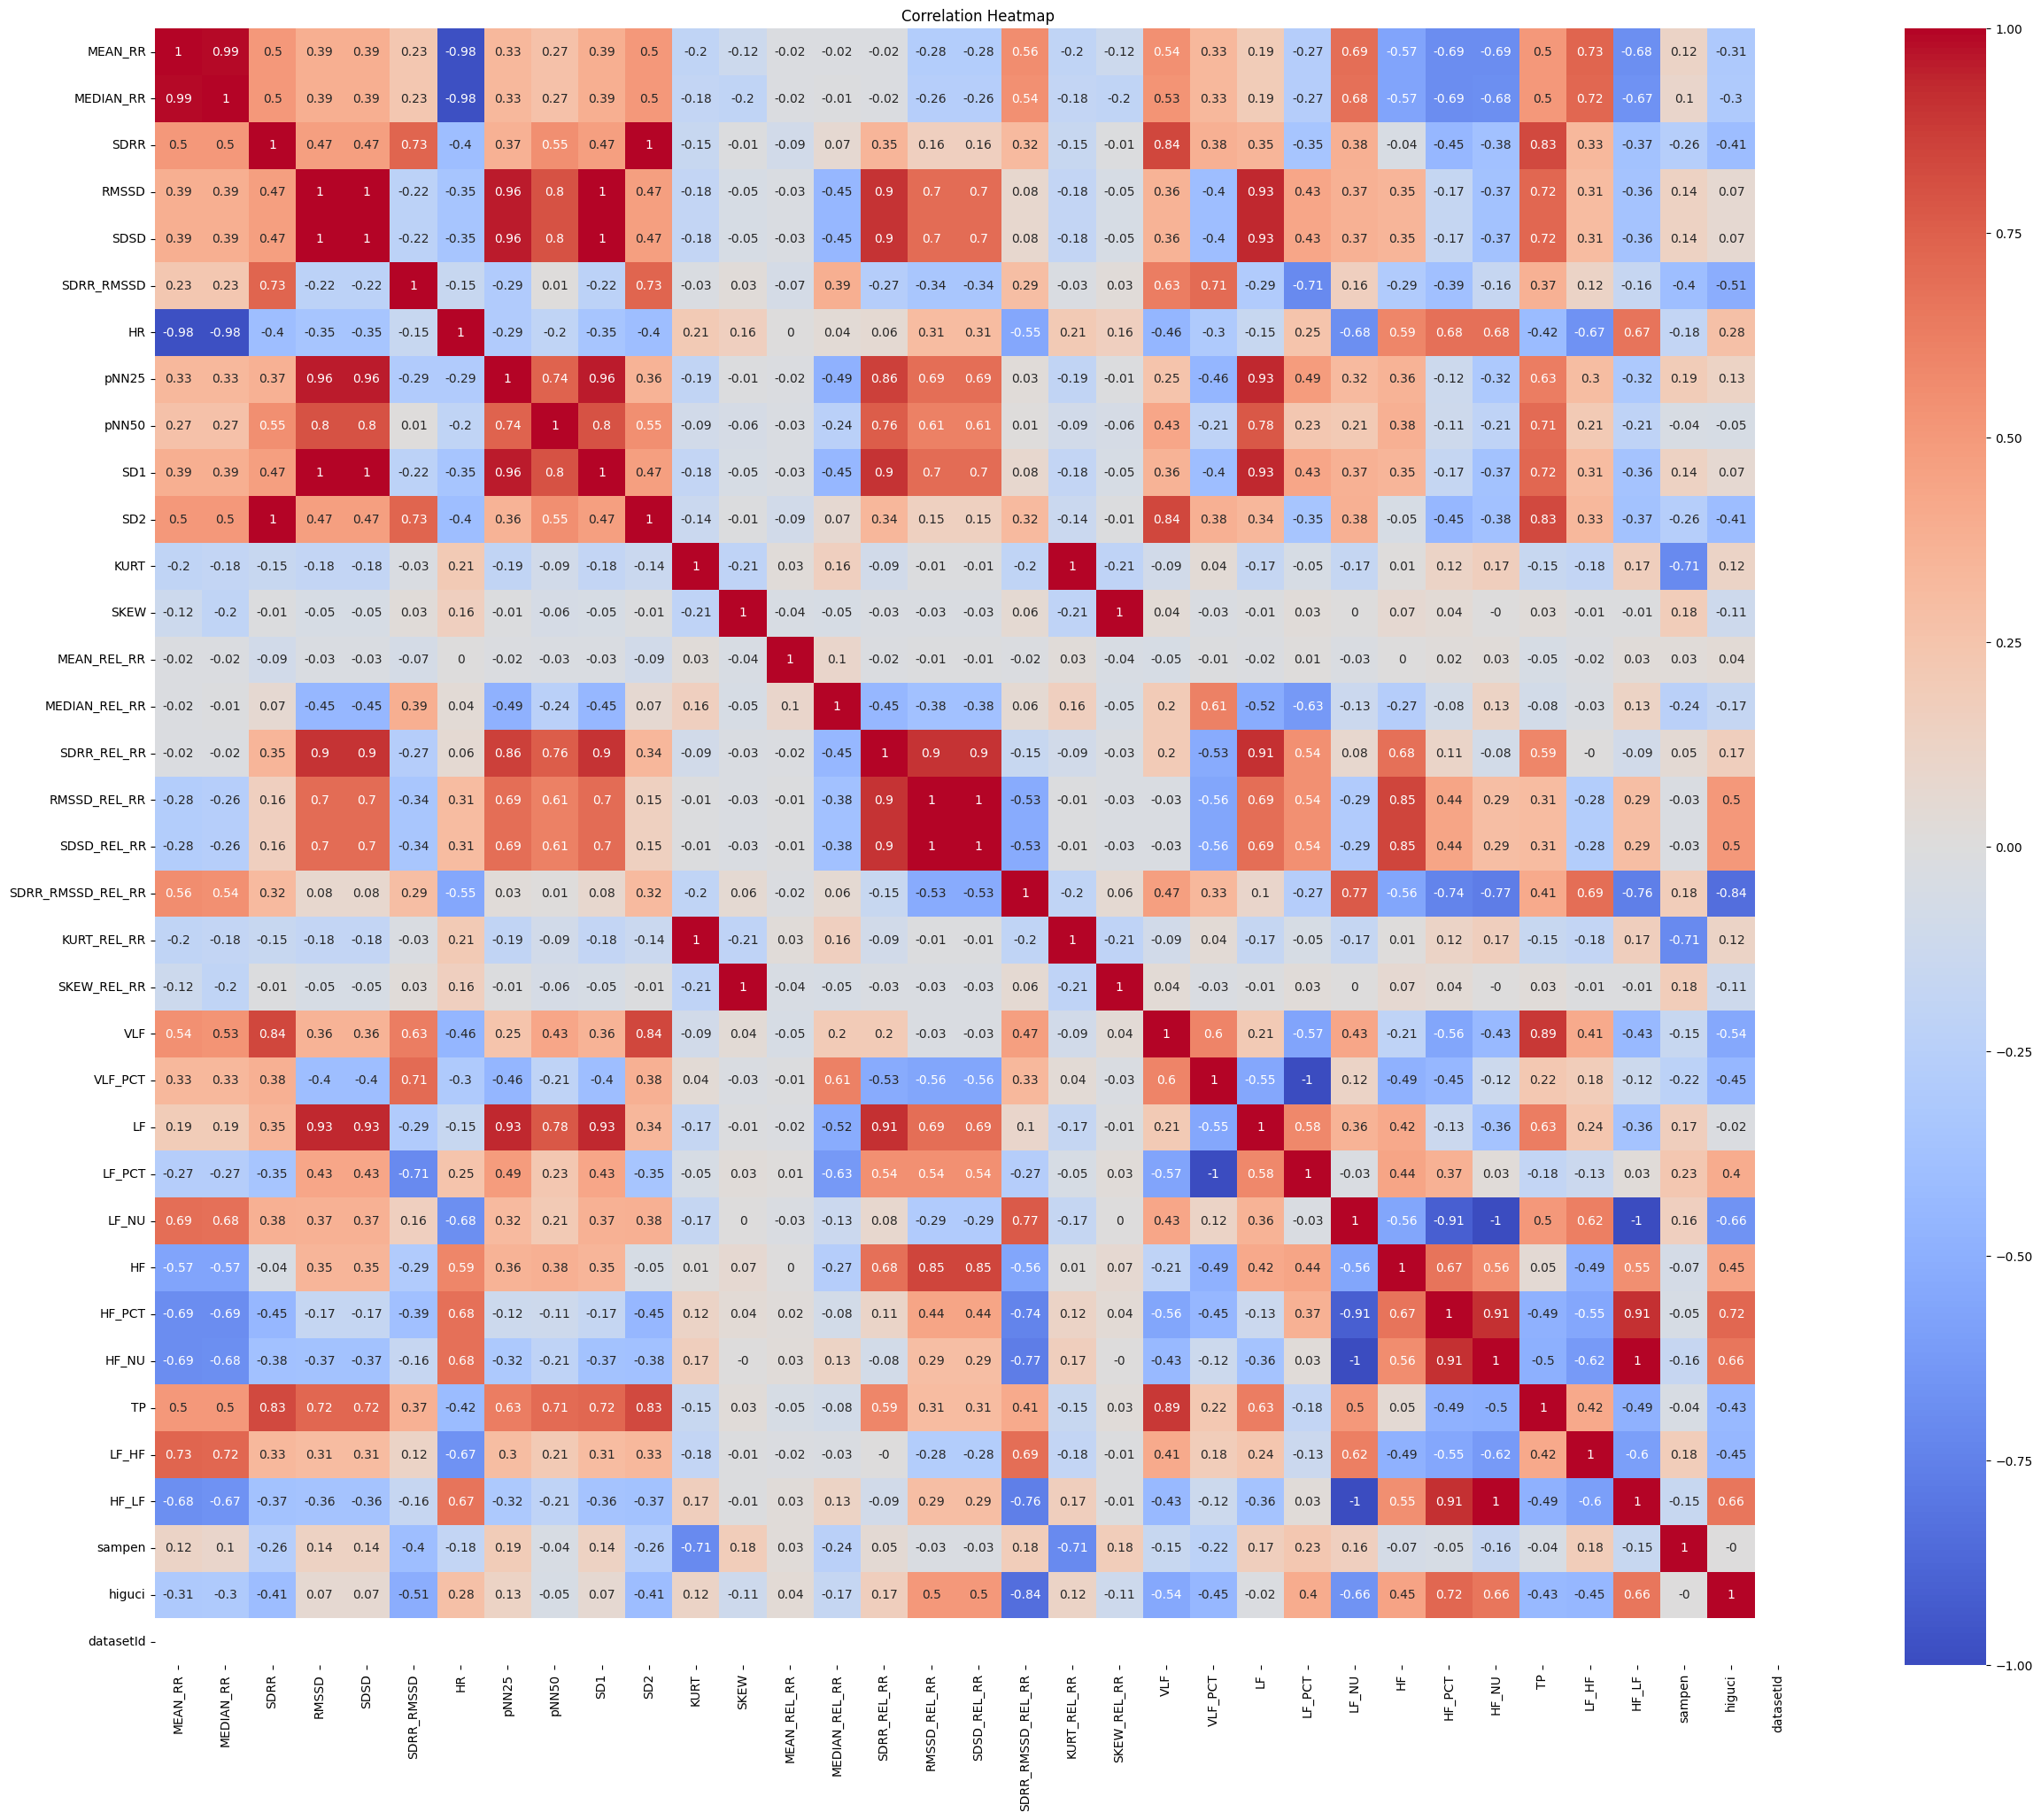

In [28]:
heatmap(cleaned_df)

In [29]:

def box_plot(df):
    plt.figure(figsize=(30, 24))
    sns.boxplot(data=df, orient='v', palette='Set2')
    plt.title('Boxplot of Numerical Features')
    plt.show()

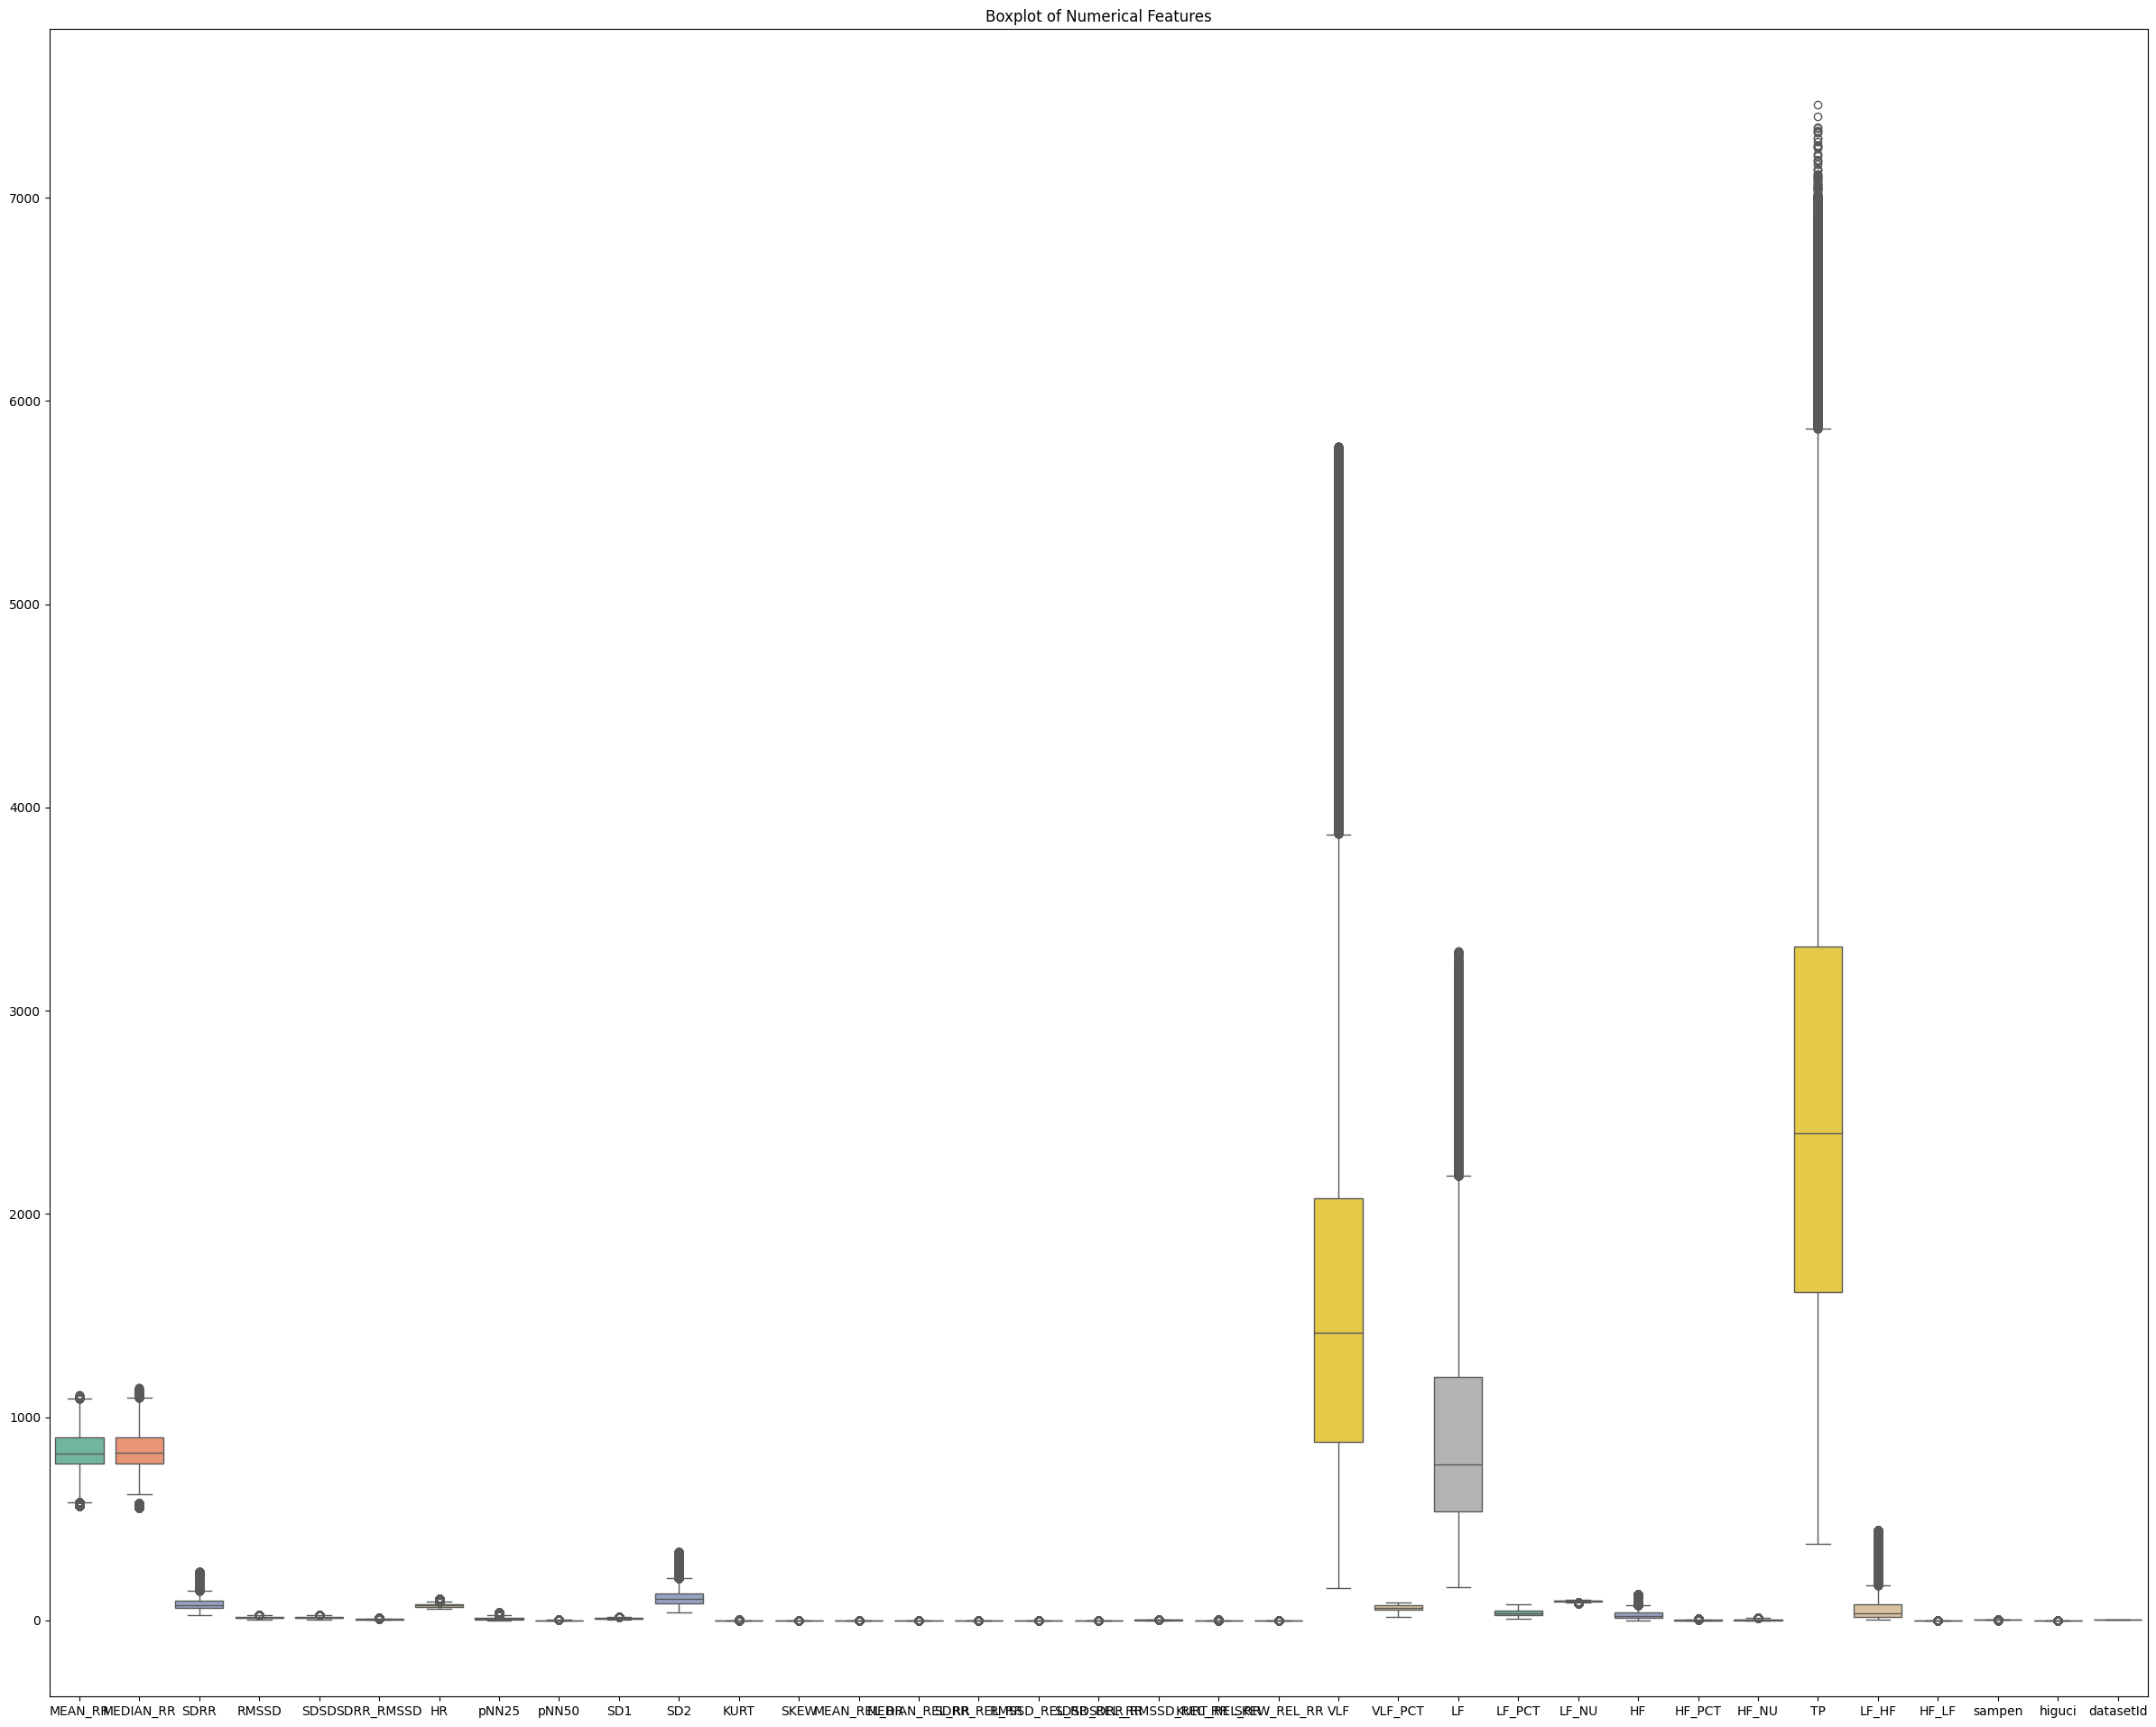

In [30]:
box_plot(cleaned_df)

In [31]:
X = df.drop(columns=['condition', 'datasetId'])
y = df['condition']

In [32]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [50]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369289 entries, 0 to 369288
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   MEAN_RR            369289 non-null  float64
 1   MEDIAN_RR          369289 non-null  float64
 2   SDRR               369289 non-null  float64
 3   RMSSD              369289 non-null  float64
 4   SDSD               369289 non-null  float64
 5   SDRR_RMSSD         369289 non-null  float64
 6   HR                 369289 non-null  float64
 7   pNN25              369289 non-null  float64
 8   pNN50              369289 non-null  float64
 9   SD1                369289 non-null  float64
 10  SD2                369289 non-null  float64
 11  KURT               369289 non-null  float64
 12  SKEW               369289 non-null  float64
 13  MEAN_REL_RR        369289 non-null  float64
 14  MEDIAN_REL_RR      369289 non-null  float64
 15  SDRR_REL_RR        369289 non-null  float64
 16  RM

In [44]:
# saarthak's code:

import numpy as np
import pandas as pd

def calculate_mad_hr(heart_rates):
    """
    Calculate Mean Absolute Deviation of Heart Rate (MAD HR)

    :param heart_rates: numpy array of heart rate values
    :return: MAD HR value
    """
    mean_hr = np.mean(heart_rates)
    abs_deviations = np.abs(heart_rates - mean_hr)
    mad_hr = np.mean(abs_deviations)
    return mad_hr

# Assuming X_train is your dataset
# If X_train is not already a pandas DataFrame, convert it:
# X_train = pd.DataFrame(X_train)

# Calculate MAD HR for each sample
X['MAD_HR'] = X.groupby(X.index).apply(lambda x: calculate_mad_hr(x['HR']))

# Now X_train has a new column 'MAD_HR' with the calculated values

# If you need the MAD_HR values as a separate array:
mad_hr_values = X['MAD_HR'].values

print("MAD HR calculation complete. New column 'MAD_HR' added to X_train.")
print(f"Shape of X_train after adding MAD_HR: {X.shape}")


MAD HR calculation complete. New column 'MAD_HR' added to X_train.
Shape of X_train after adding MAD_HR: (369289, 35)


In [56]:
def calculate_avnn(mean_rr_values):
    """
    Calculate AVNN (Average of NN intervals) using MEAN_RR column

    Parameters:
    mean_rr_values (array-like): Array of mean RR interval values

    Returns:
    float: AVNN value
    """
    return np.mean(mean_rr_values)

def calculate_sdann(mean_rr_values, window_size=300):
    """
    Calculate SDANN (Standard Deviation of Average NN intervals)
    using MEAN_RR column

    Parameters:
    mean_rr_values (array-like): Array of mean RR interval values
    window_size (int): Size of the window in samples (default 300 for 5-min segments)

    Returns:
    float: SDANN value
    """
    # Calculate means of successive windows
    windows = [mean_rr_values[i:i+window_size] for i in range(0, len(mean_rr_values), window_size)]
    window_means = [np.mean(window) for window in windows if len(window) > 0]

    # Calculate standard deviation of these means
    return np.std(window_means)

# Calculate features for each row in the DataFrame
def calculate_features_for_row(row):
    """
    Calculate features for a single row
    """
    return {
        'AVNN': calculate_avnn([row['MEAN_RR']]),
        'SDANN': calculate_sdann([row['MEAN_RR']])
    }

# Add features to DataFrame
features = X.apply(calculate_features_for_row, axis=1).apply(pd.Series)
X['AVNN'] = features['AVNN']
X['SDANN'] = features['SDANN']

In [61]:
def calculate_std_hr(hr_values):
    """
    Calculate Standard Deviation of Heart Rate

    Parameters:
    hr_values (array-like): Array of heart rate values

    Returns:
    float: STD HR value
    """
    return np.std(hr_values)

def calculate_median_hr(hr_values):
    """
    Calculate Median Heart Rate

    Parameters:
    hr_values (array-like): Array of heart rate values

    Returns:
    float: Median HR value
    """
    return np.median(hr_values)

# Add features to DataFrame
def add_hr_features(X):
    """
    Add additional heart rate features to DataFrame

    Parameters:
    X (pandas.DataFrame): DataFrame containing 'HR' column

    Returns:
    pandas.DataFrame: DataFrame with new features added
    """
    X['STD_HR'] = X['HR'].apply(calculate_std_hr)
    X['MEDIAN_HR'] = X['HR'].apply(calculate_median_hr)
    return X

X= add_hr_features(X)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
#####################################
# 1. Logistic Regression
#####################################


log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate Logistic Regression
print("\nLogistic Regression Metrics:")
print(classification_report(y_test, y_pred_log_reg, target_names=label_encoder.classes_))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Metrics:
              precision    recall  f1-score   support

    Stressed       0.64      0.51      0.57     33785
   no stress       0.65      0.76      0.70     40073

    accuracy                           0.65     73858
   macro avg       0.65      0.64      0.64     73858
weighted avg       0.65      0.65      0.64     73858

Confusion Matrix:
[[17207 16578]
 [ 9483 30590]]


In [64]:
#####################################
# 2. Decision Tree Classifier
#####################################
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
X_train.info()
y_pred_decision_tree = decision_tree.predict(X_test)

# Evaluate Decision Tree
print("\nDecision Tree Metrics:")
print(classification_report(y_test, y_pred_decision_tree, target_names=label_encoder.classes_))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_decision_tree))

<class 'pandas.core.frame.DataFrame'>
Index: 295431 entries, 78225 to 121958
Data columns (total 39 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   MEAN_RR            295431 non-null  float64
 1   MEDIAN_RR          295431 non-null  float64
 2   SDRR               295431 non-null  float64
 3   RMSSD              295431 non-null  float64
 4   SDSD               295431 non-null  float64
 5   SDRR_RMSSD         295431 non-null  float64
 6   HR                 295431 non-null  float64
 7   pNN25              295431 non-null  float64
 8   pNN50              295431 non-null  float64
 9   SD1                295431 non-null  float64
 10  SD2                295431 non-null  float64
 11  KURT               295431 non-null  float64
 12  SKEW               295431 non-null  float64
 13  MEAN_REL_RR        295431 non-null  float64
 14  MEDIAN_REL_RR      295431 non-null  float64
 15  SDRR_REL_RR        295431 non-null  float64
 16  RMS

In [ ]:
#####################################
# 3. Random Forest Classifier
#####################################

random_forest = RandomForestClassifier(random_state=42, n_jobs=-1)
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)

# Evaluate Random Forest
print("\nRandom Forest Metrics:")
print(classification_report(y_test, y_pred_random_forest, target_names=label_encoder.classes_))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_random_forest))

In [ ]:
#####################################
# 7. Perceptron Classifier
#####################################


perceptron = Perceptron(random_state=42)
perceptron.fit(X_train_scaled, y_train)
y_pred_perceptron = perceptron.predict(X_test_scaled)

# Evaluate Perceptron
print("\nPerceptron Metrics:")
print(classification_report(y_test, y_pred_perceptron, target_names=label_encoder.classes_))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_perceptron))

In [ ]:
def calculate_errors(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Training error
    train_pred = model.predict(X_train)
    train_error = 1 - accuracy_score(y_train, train_pred)

    # Validation error
    test_pred = model.predict(X_test)
    test_error = 1 - accuracy_score(y_test, test_pred)

    return train_error, test_error

# Initialize lists to store errors
train_errors = []
test_errors = []

#####################################
# 1. Logistic Regression
#####################################
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
train_error_log_reg, test_error_log_reg = calculate_errors(log_reg, X_train, y_train, X_test, y_test)
train_errors.append(train_error_log_reg)
test_errors.append(test_error_log_reg)

#####################################
# 2. Decision Tree Classifier
#####################################
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=42)
train_error_decision_tree, test_error_decision_tree = calculate_errors(decision_tree, X_train, y_train, X_test, y_test)
train_errors.append(train_error_decision_tree)
test_errors.append(test_error_decision_tree)

#####################################
# 3. Random Forest Classifier
#####################################
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42, n_jobs=-1)
train_error_random_forest, test_error_random_forest = calculate_errors(random_forest, X_train, y_train, X_test, y_test)
train_errors.append(train_error_random_forest)
test_errors.append(test_error_random_forest)

# #####################################
# # 4. Support Vector Machine (SVM)
# #####################################
# from sklearn.svm import SVC
# svm = SVC(kernel='linear', random_state=42)
# train_error_svm, test_error_svm = calculate_errors(svm, X_train_scaled, y_train, X_test_scaled, y_test)
# train_errors.append(train_error_svm)
# test_errors.append(test_error_svm)

# #####################################
# # 5. XGBoost Classifier
# #####################################
# from xgboost import XGBClassifier
# xgboost = XGBClassifier(random_state=42)
# train_error_xgboost, test_error_xgboost = calculate_errors(xgboost, X_train, y_train, X_test, y_test)
# train_errors.append(train_error_xgboost)
# test_errors.append(test_error_xgboost)

# #####################################
# # 6. AdaBoost Classifier
# #####################################
# from sklearn.ensemble import AdaBoostClassifier
# adaboost = AdaBoostClassifier(random_state=42)
# train_error_adaboost, test_error_adaboost = calculate_errors(adaboost, X_train, y_train, X_test, y_test)
# train_errors.append(train_error_adaboost)
# test_errors.append(test_error_adaboost)

#####################################
# 7. Perceptron Classifier
#####################################
from sklearn.linear_model import Perceptron
perceptron = Perceptron(random_state=42)
train_error_perceptron, test_error_perceptron = calculate_errors(perceptron, X_train_scaled, y_train, X_test_scaled, y_test)
train_errors.append(train_error_perceptron)
test_errors.append(test_error_perceptron)

# Model Names
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Perceptron']

# Plot the bias (training error) and variance (validation error)
plt.figure(figsize=(10, 6))
plt.plot(model_names, train_errors, label='Training Error (Bias)', marker='o', color='blue')
plt.plot(model_names, test_errors, label='Validation Error (Variance)', marker='o', color='red')
plt.title('Bias vs Variance (Train Error vs Test Error)')
plt.xlabel('Model')
plt.ylabel('Error')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

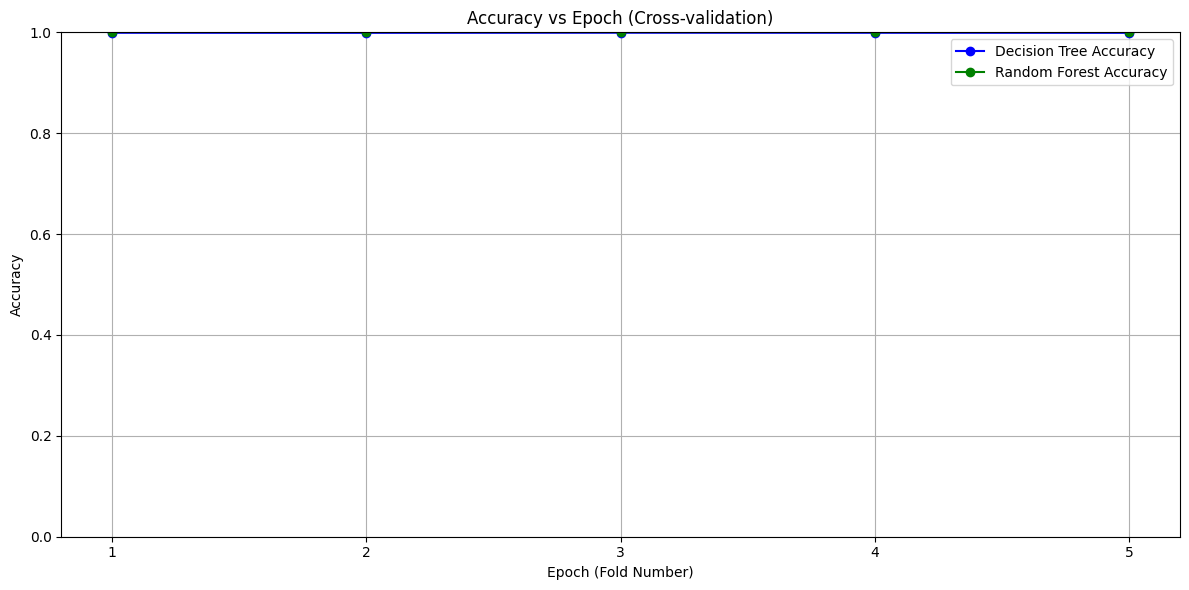

In [41]:
# Initialize the classifiers
from sklearn.model_selection import StratifiedKFold


dt_classifier = DecisionTreeClassifier(random_state=42)
rf_classifier = RandomForestClassifier(random_state=42, n_jobs=-1)

# Number of epochs (in this case, using 5-fold cross-validation)
num_epochs = 5
cv = StratifiedKFold(n_splits=num_epochs)

# Store accuracies for each epoch
dt_accuracies = []
rf_accuracies = []

# Calculate accuracies for Decision Tree
for train_index, test_index in cv.split(X_train, y_train):
    X_cv_train, X_cv_test = X_train.iloc[train_index], X_train.iloc[test_index]
    y_cv_train, y_cv_test = y_train.iloc[train_index], y_train.iloc[test_index]

    dt_classifier.fit(X_cv_train, y_cv_train)
    dt_accuracy = dt_classifier.score(X_cv_test, y_cv_test)
    dt_accuracies.append(dt_accuracy)

# Calculate accuracies for Random Forest
for train_index, test_index in cv.split(X_train, y_train):
    X_cv_train, X_cv_test = X_train.iloc[train_index], X_train.iloc[test_index]
    y_cv_train, y_cv_test = y_train.iloc[train_index], y_train.iloc[test_index]

    rf_classifier.fit(X_cv_train, y_cv_train)
    rf_accuracy = rf_classifier.score(X_cv_test, y_cv_test)
    rf_accuracies.append(rf_accuracy)

# Plotting accuracy vs epochs for both classifiers
plt.figure(figsize=(12, 6))
plt.plot(range(1, num_epochs + 1), dt_accuracies, marker='o', label='Decision Tree Accuracy', color='blue')
plt.plot(range(1, num_epochs + 1), rf_accuracies, marker='o', label='Random Forest Accuracy', color='green')

plt.title('Accuracy vs Epoch (Cross-validation)')
plt.xlabel('Epoch (Fold Number)')
plt.ylabel('Accuracy')
plt.xticks(range(1, num_epochs + 1))
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()